In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
path = 'C:/Users/Learning/Data portal (local)/iris.csv'
df = pd.read_csv(path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
df_scaled = sc.fit_transform(df)

In [9]:
x = df_scaled

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)    

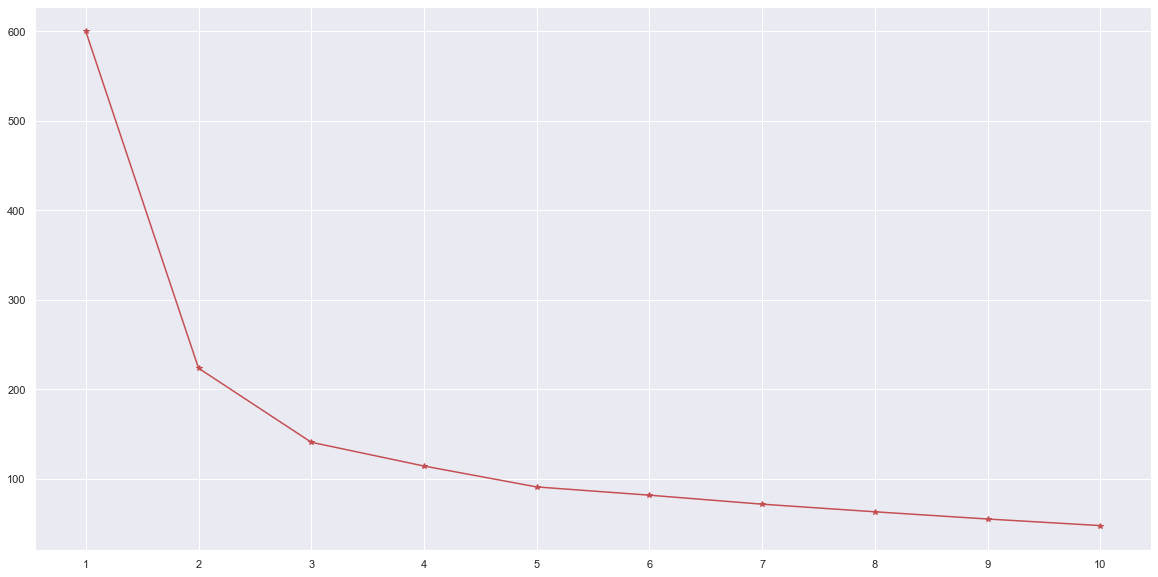

In [11]:
#implementing the elbow method to get the optimal value of 'k'
k = list(range(1,11))
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0,11,1))
plt.plot(k,wcss,'-r*')
plt.show()

In [12]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [13]:
df['cluster'] = kmeans.fit_predict(x)

In [14]:
df

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [15]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,cluster
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.458215
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.418513
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.232209
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.268605
cluster,-0.458215,-0.418513,-0.232209,-0.268605,1.000000


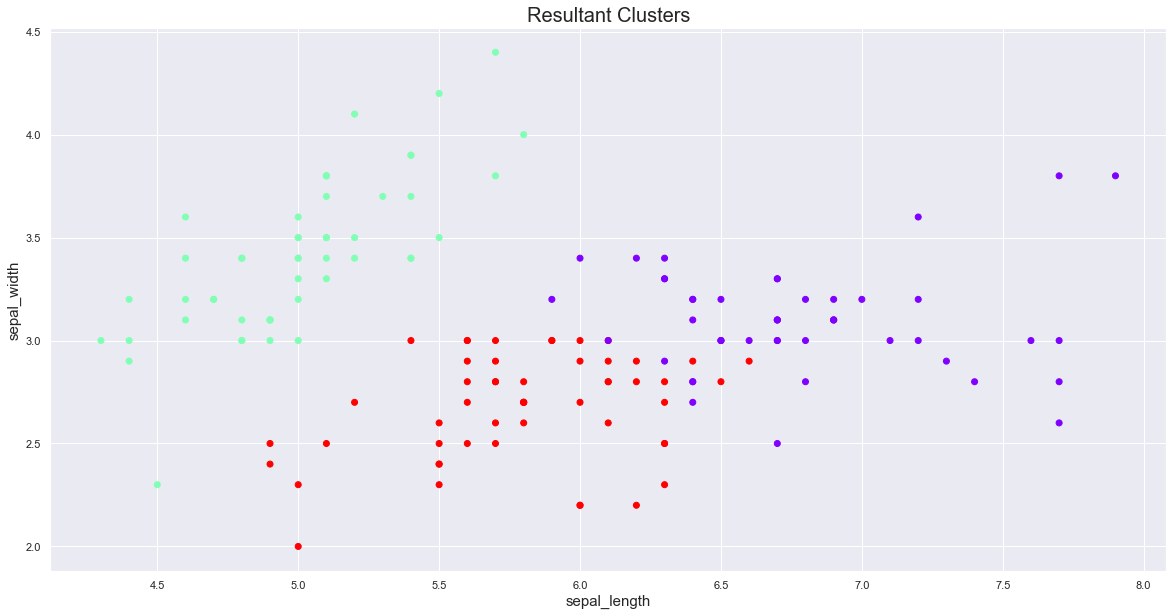

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(df['sepal_length'],df['sepal_width'],c=df['cluster'],cmap='rainbow')
plt.xlabel('sepal_length',fontsize=15)
plt.ylabel('sepal_width',fontsize=15)
plt.title("Resultant Clusters",fontsize=20)
plt.show()

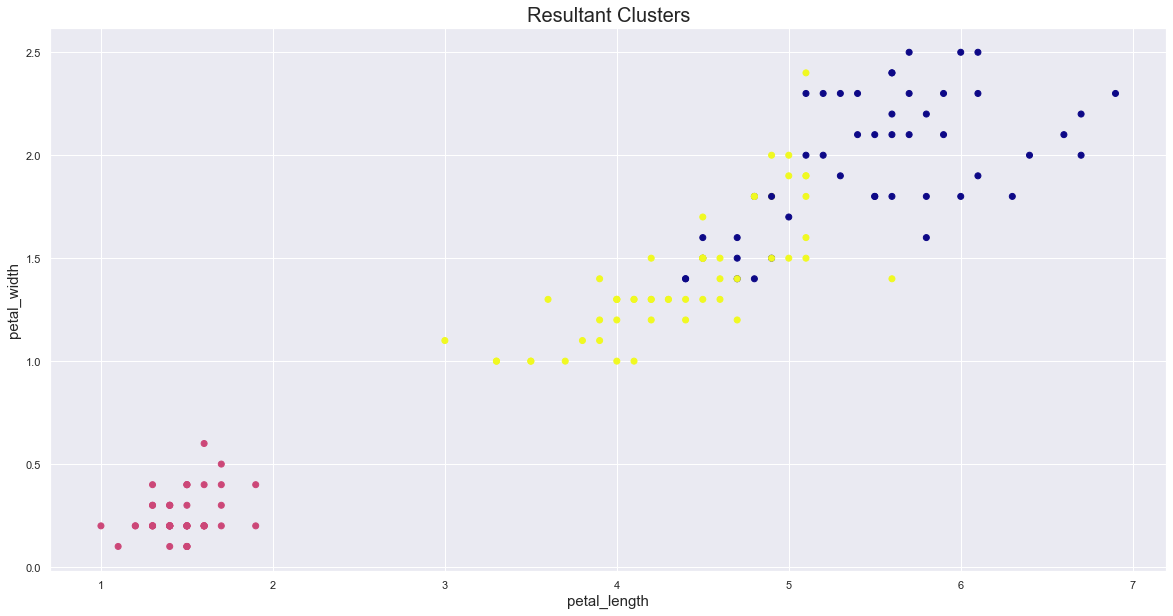

In [17]:
plt.figure(figsize=(20,10))
plt.scatter(df['petal_length'],df['petal_width'],c=df['cluster'],cmap='rainbow')
plt.xlabel('petal_length',fontsize=15)
plt.ylabel('petal_width',fontsize=15)
plt.title("Resultant Clusters",fontsize=20)
plt.show()